## This program estimates the paramters of the  logistic m growth model of Algae using least square method. 
### This is the project work of CM 3rd year/1st sem students (Sikkum Rai, Bishwas Adhikari, Allen Maharjan)


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib  inline

# This function extract the data needed for least square fitting for logistic model
def DataforLeastSquare(t,y):
    X,Y = [],[]
    for i in range(1,len(t)-1):
        X.append(y[i])
        Y.append(((y[i+1]-y[i-1])/(t[i+1]-t[i-1]))/y[i])
    X=np.array(X)
    Y=np.array(Y)
    return X,Y
#-----------------------------------------#


# This function estimates the parameter of least square line fitting
def LeastSquareMethod(X,Y):
    n = len(X)
    Deno = n*sum(X*X)-sum(X)*sum(X)
    a = (sum(Y)*sum(X*X)-sum(X)*sum(X*Y))/Deno
    b = (n*sum(X*Y)-sum(X)*sum(Y))/Deno
    return a,b
#-------------------------------------------#



# This function plots the logistic fit and data
def PlotLogisticEstimation(X,Y,t,y,FileName):
    a,b = LeastSquareMethod(X,Y)
    mu = a # Specific growth rate
    k = -mu/b # Carrying capacity
    
    # Preparation for Sub-plot
    font_size=15
    label_size=20
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    plt.rc('xtick', labelsize=label_size) 
    plt.rc('ytick', labelsize=label_size)
    # Plot for Least Square Line-START
    x1 = np.linspace(X[0],X[-1],10)
    y1 = a + b*x1
 
    ax[0].plot(x1,y1,'b',linewidth=4.0)
    ax[0].plot(X,Y,'ro',markersize=10)
    ax[0].set_title("Linear Fitting of Data from " + FileName,fontsize=font_size)
    ax[0].set_xlabel('y',fontsize=font_size)
    ax[0].set_ylabel('$(dy/dt)/y$',fontsize=font_size)
    ax[0].legend(labels=('Fit', 'Data'), loc='upper right',fontsize=font_size) 
    # Plot for Least Square Line-END
   
    # Plot for Logistic-START
    t = np.array(t)
    y = np.array(y)
    y0 = y[0]
    T = np.linspace(t[0],t[-1],50)
    Y = y0*k/(y0+(k-y0)*np.exp(-mu*T))
    ax[1].plot(T,Y,'b',linewidth=4.0)
    ax[1].plot(t,y,'ro',markersize=10)
    ax[1].set_title("Logistic Growth Model of Algae Data from " + FileName,fontsize=font_size)
    ax[1].set_xlabel('Time [Hours]',fontsize=font_size)
    ax[1].set_ylabel('Population [OD]',fontsize=font_size)
    ax[1].legend(labels=('Fit', 'Data'), loc='upper left',fontsize=font_size) 
    # Plot for Logistic-END


#-------------------------------------------#

# This function calculates the coefficient of determination for linear fit
def CoefficientDetermination(X,Y,a,b):    
    f = a + b*X
    Y_bar = np.mean(Y)
    SS_res = sum((Y-f)*(Y-f))
    SS_tot = sum((Y-Y_bar)*(Y-Y_bar))
    Rsquare = 1 - SS_res/SS_tot
    return Rsquare
    
#-------------------------------------------#


# This function is main file reads the data from .csv file and uses above functions
MU = []
K = []
D = []
def main(FileName):
    data = pd.read_csv("{}.csv".format(FileName))
    t = data['hour']
    y = data['abs']
    if (t[1]==1.23):
        t = t*24.0     
                
    X,Y = DataforLeastSquare(t,y) # Calling the function
    a,b = LeastSquareMethod(X,Y)  # Calling the function
#    PlotLinearFit(X,Y,a,b,FileName) # Calling the function
    mu = a # Specific growth rate
    k = -mu/b # Carrying capacity
    PlotLogisticEstimation(X,Y,t,y,FileName)     # Calling the function
    Rsquare = CoefficientDetermination(X,Y,a,b) # Calling the function
    # Appending the data in the list
    MU.append(mu)
    K.append(k)
    D.append(Rsquare)
    print('Specific Growth Rate = %6.2f'%mu)
    print('Carrying Capacity = %6.2f'%k)
    print('Coefficient of Determination = %6.2f'%Rsquare)
#-------------------------------------------#-------------------------------------------#  

    

Specific Growth Rate =   0.04
Carrying Capacity =   1.19
Coefficient of Determination =   0.92


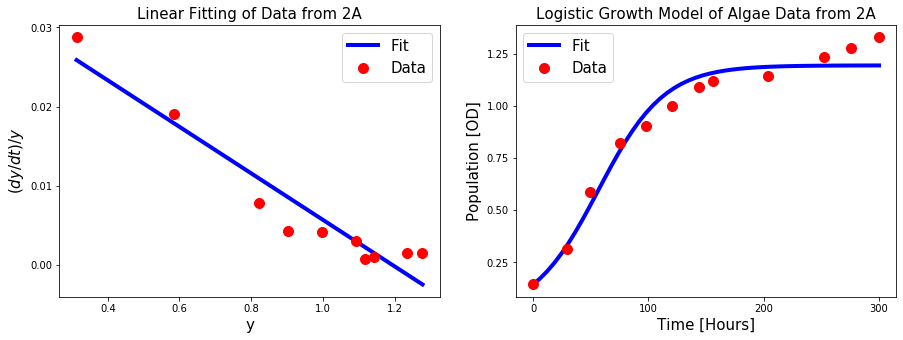

In [2]:
main('2A') 


Specific Growth Rate =   0.03
Carrying Capacity =   1.50
Coefficient of Determination =   0.86


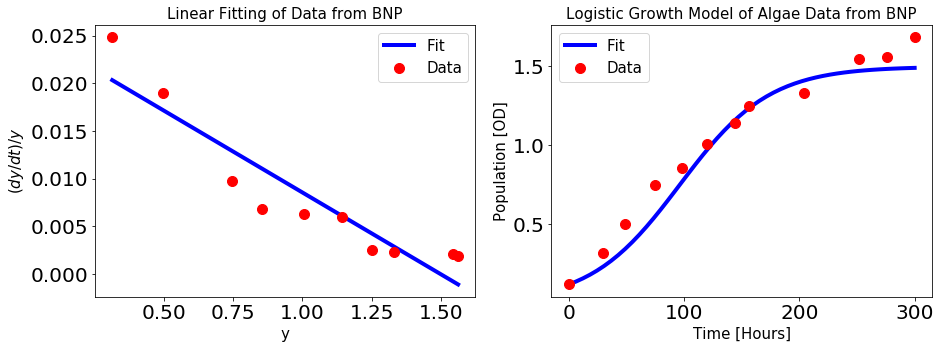

In [3]:
main('BNP') 

Specific Growth Rate =   0.03
Carrying Capacity =   1.99
Coefficient of Determination =   0.81


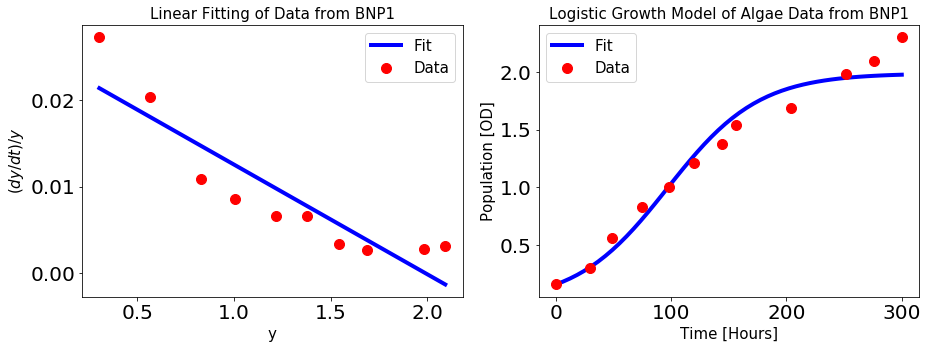

In [4]:
main('BNP1')

Specific Growth Rate =   0.04
Carrying Capacity =   1.47
Coefficient of Determination =   0.98


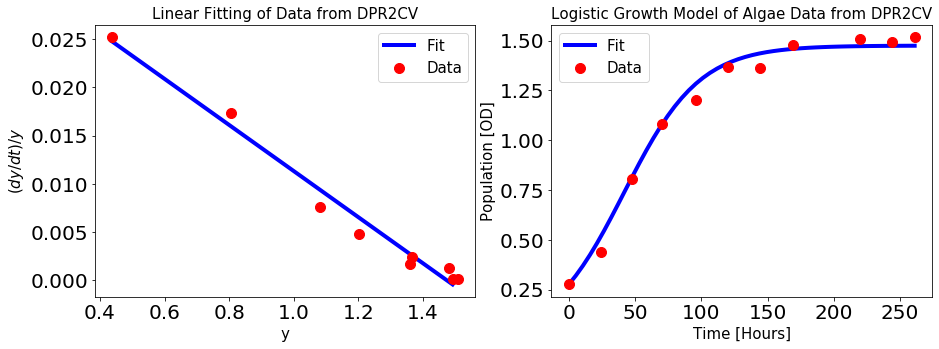

In [5]:
main('DPR2CV')

Specific Growth Rate =   0.03
Carrying Capacity =   1.58
Coefficient of Determination =   0.71


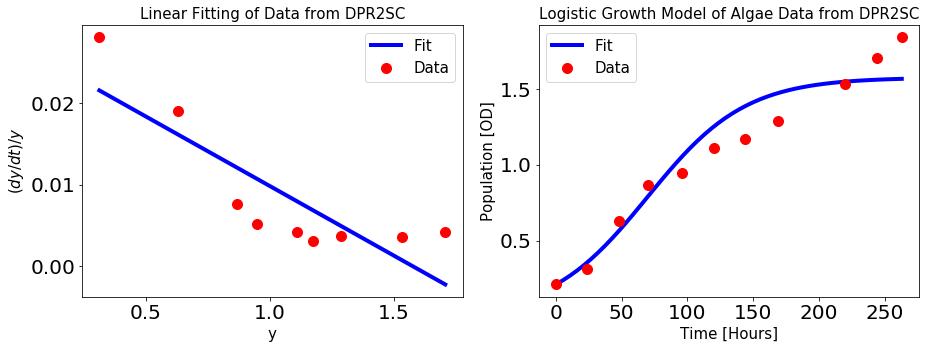

In [6]:
main('DPR2SC')

Specific Growth Rate =   0.03
Carrying Capacity =   1.60
Coefficient of Determination =   0.91


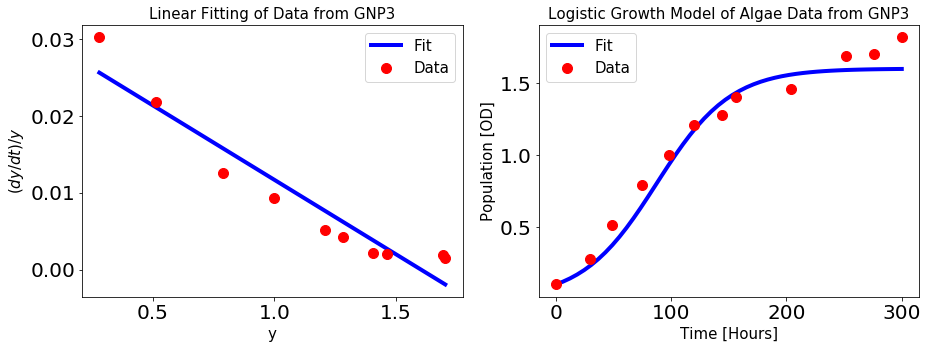

In [7]:
main('GNP3')

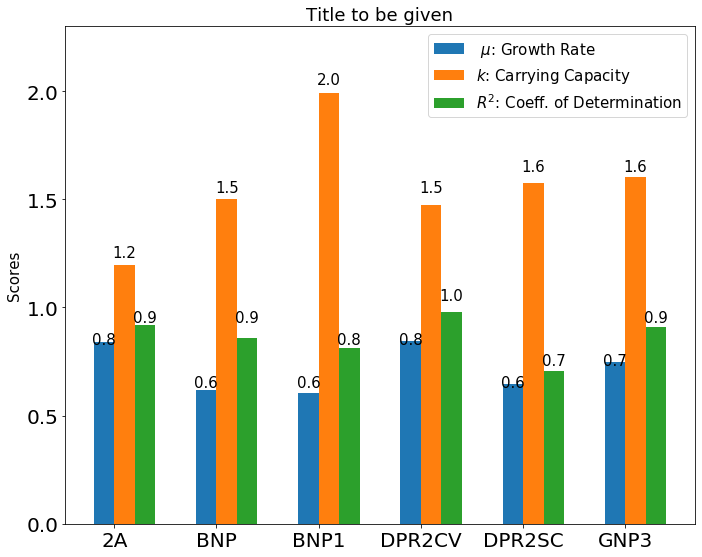

In [9]:
# This cell plots the group bar diagram of specific growth Rate, carrying capacity,specific growth rate
MU1 = np.array(MU)*24 # Growth rate calcualted per Day
labels = ['2A','BNP','BNP1','DPR2CV','DPR2SC','GNP3']
x = 1.5*np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
plt.rc('font', size=15) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
fig, ax = plt.subplots(1,1,figsize=(10,8))
rects1 = ax.bar(x - width/2, MU1, width,label=' $\mu$: Growth Rate')
rects2 = ax.bar(x + width/2, K, width, label='$k$: Carrying Capacity')
rects3 = ax.bar(x + 3*width/2, D, width, label='$R^2$: Coeff. of Determination')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Title to be given')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
#ax.set_xlim(-1,7)
ax.set_ylim(0,2.3)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        height = round(height,1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
